In [33]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
#Importing the "monthly_data_cleaned.csv" which was made at the end of  outliar detection file

monthly_data = pd.read_csv('monthly_data_cleaned.csv', index_col = 'date',infer_datetime_format=True)
monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data.Commodity = monthly_data.Commodity.str.lower()
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,,,
2014-09-01,Kurdwadi,sorgum(jawar),2014,September,454,1353,2610,1981
2014-09-01,Satara,ladies finger,2014,September,128,2435,3261,2848
2014-09-01,Satara,potato,2014,September,2988,2175,2488,2331
2014-09-01,Satara,ginger (fresh),2014,September,199,3438,4813,4125
2014-09-01,Satara,ground nut pods (dry),2014,September,1,3000,4000,3500


In [35]:
monthly_data.index

DatetimeIndex(['2014-09-01', '2014-09-01', '2014-09-01', '2014-09-01',
               '2014-09-01', '2014-09-01', '2014-09-01', '2014-09-01',
               '2014-09-01', '2014-09-01',
               ...
               '2016-11-01', '2016-11-01', '2016-11-01', '2016-11-01',
               '2016-11-01', '2016-11-01', '2016-11-01', '2016-11-01',
               '2016-11-01', '2016-11-01'],
              dtype='datetime64[ns]', name='date', length=62426, freq=None)

In [37]:
#This is a function which will identify the type of seasonality and will apply seasonal decompositon

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
def identify_seasonality(apmc, commodity):
    timeseries = monthly_data[(monthly_data.APMC == apmc) & (monthly_data.Commodity == commodity)].modal_price
    #print(timeseries)
    #timeseries.dropna()
    
    #timeseries.astype('float64')
    
    decomposition_add = sm.tsa.seasonal_decompose(timeseries, model= 'additive')
    decomposition_mult = sm.tsa.seasonal_decompose(timeseries, model= 'multiplicative')

    resid_add = decomposition_add.resid
    resid_add = resid_add.dropna().values

    resid_mult = decomposition_mult.resid
    resid_mult = resid_mult.dropna().values

    additive_acf = acf(resid_add)
    multiplicative_acf = acf(resid_mult)

    if additive_acf.all() < multiplicative_acf.all():
        season_type = "additive"
    else:
        season_type = "multiplicative"
    print("This is a/an " + season_type  + " type seasonality.")
    decomposition = sm.tsa.seasonal_decompose(timeseries, model= season_type)
    decomposition.plot()

Enter an APMC: Satara
Enter a relevant commodity: potato
This is a/an additive type seasonality.


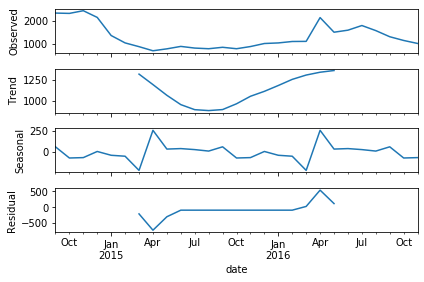

In [38]:
#Enter your commodity and APMC

apmc = input("Enter an APMC: ")
commodity = input("Enter a relevant commodity: ")
identify_seasonality(apmc, commodity)

In [39]:
# This function will deseasonalize the timeseries 

def deseasonalise(apmc, commodity):
    timeseries = monthly_data[(monthly_data.APMC == apmc) & (monthly_data.Commodity == commodity)].modal_price
    #timeseries = pd.to_datetime(timeseries)
    decomposition_add = sm.tsa.seasonal_decompose(timeseries, freq= 1,model= 'additive')
    decomposition_mult = sm.tsa.seasonal_decompose(timeseries, freq=1,model= 'multiplicative')

    resid_add = decomposition_add.resid
    resid_add = resid_add.dropna().values

    resid_mult = decomposition_mult.resid
    resid_mult = resid_mult.dropna().values

    additive_acf = acf(resid_add)
    multiplicative_acf = acf(resid_mult)

    if additive_acf.all() < multiplicative_acf.all():
        season_type = "additive"
    else:
        season_type = "multiplicative"
    print("This is a/an " + season_type  + " type seasonality.")
    decomposition = sm.tsa.seasonal_decompose(timeseries, model= season_type)
    raw = decomposition.observed
    deseasonalised = decomposition.trend
    return raw, deseasonalised

Enter an APMC: Satara
Enter a relevant commodity: potato
This is a/an multiplicative type seasonality.


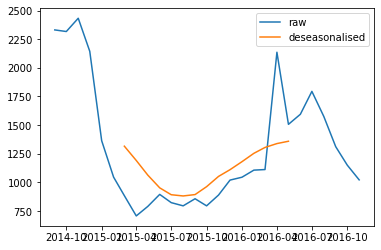

In [40]:
apmc = input("Enter an APMC: ")
commodity = input("Enter a relevant commodity: ")
raw, deseasonalised = deseasonalise(apmc, commodity)
plt.plot(raw, label = 'raw')
plt.plot(deseasonalised, label = 'deseasonalised')
plt.legend(loc = 'best')